In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os
import warnings

os.chdir('D:\Data analysis\Python\Python_sublessons\Kaggle_competition\House_pricing')
warnings.filterwarnings(action = 'ignore')

# Train csv

In [2]:
data = pd.read_csv('./train.csv')

df = data.copy()

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

In [3]:
with open('./data_description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = 100*df.isnull().sum()/df.isnull().count()

percent_2 = (round(percent_1, 1)).sort_values(ascending = False)

missing_data = pd.concat([total, percent_2], axis=1, keys = ['Total', 'Pct'])


missing_data.head(10)

,Total,Pct
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageYrBlt,81,5.5
GarageCond,81,5.5
GarageType,81,5.5
GarageFinish,81,5.5


In [7]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [8]:
percent_nan = percent_missing(df)

percent_nan

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

<Axes: >

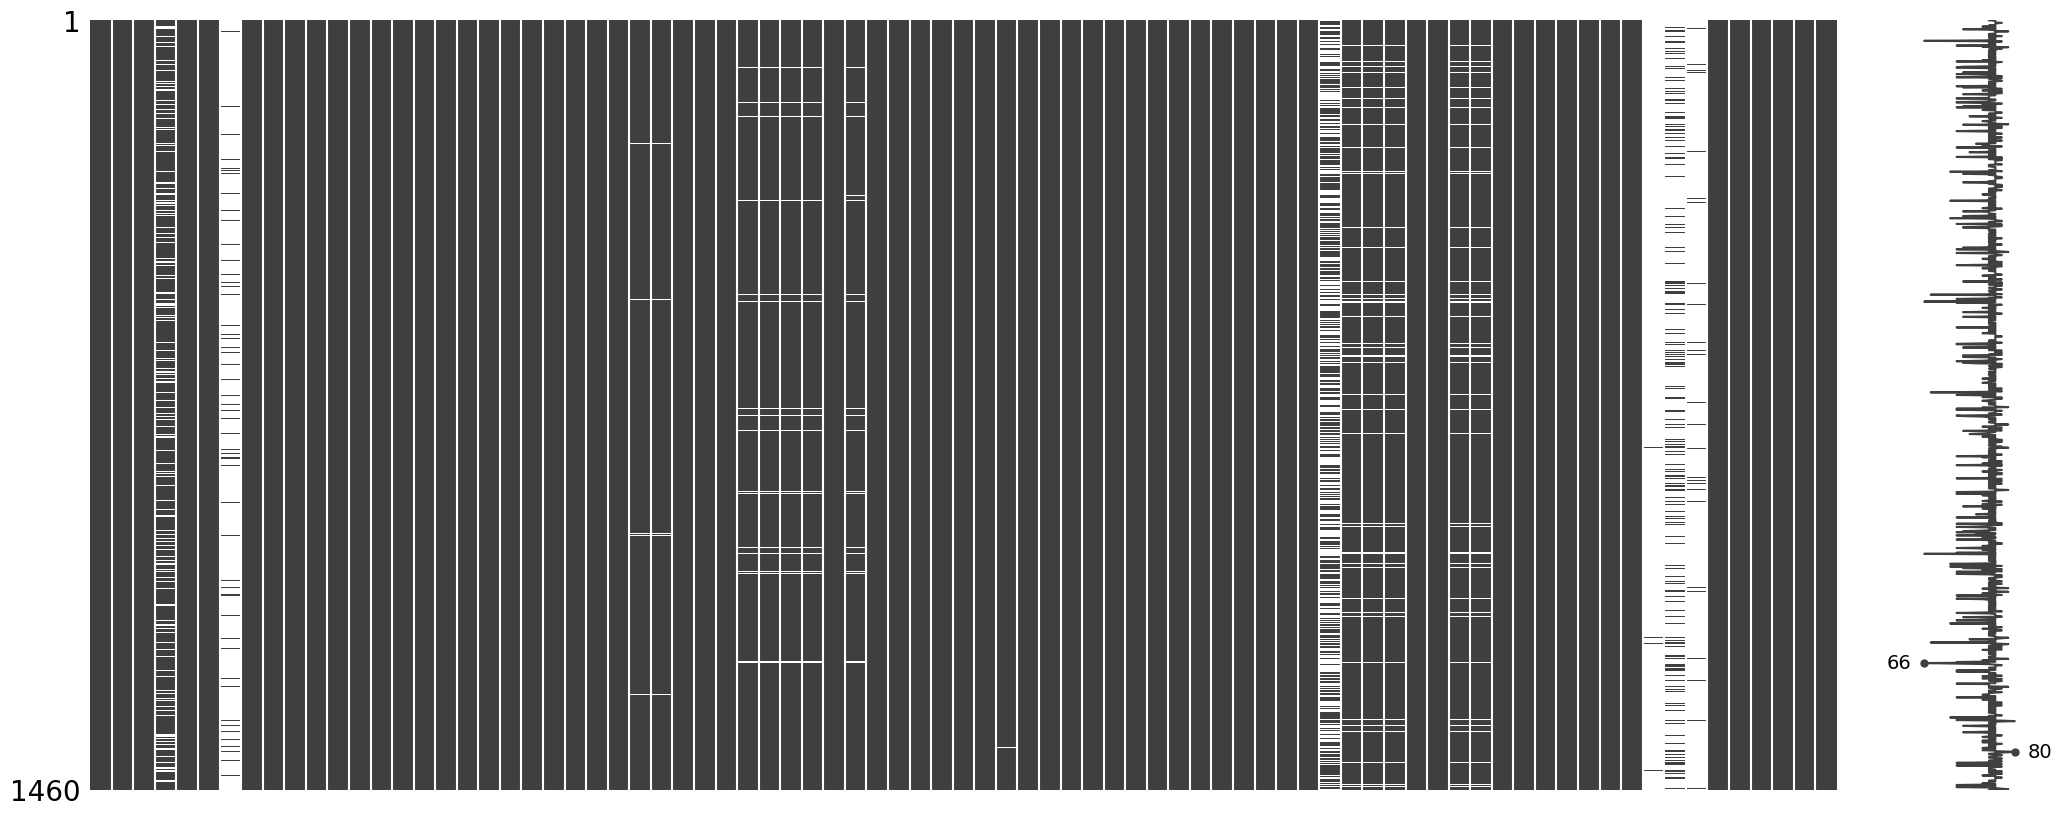

In [9]:
msno.matrix(df)

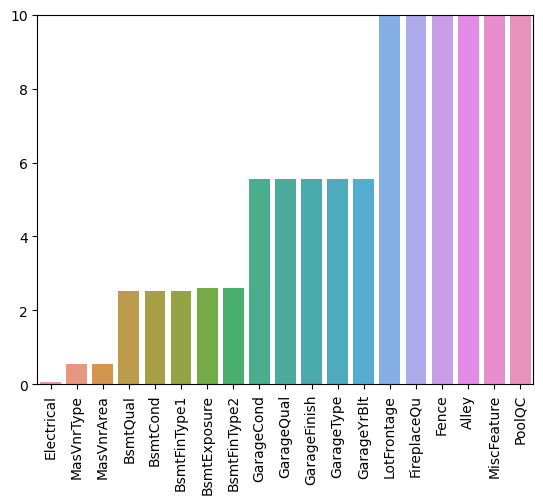

In [10]:
sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,10);

## Electrical na

In [11]:
df['Electrical'].fillna(method='ffill',inplace=True)

In [12]:
percent_nan[percent_nan < 5]

Electrical      0.068493
MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
BsmtExposure    2.602740
BsmtFinType2    2.602740
dtype: float64

## MasVnr na

In [13]:
df[df['MasVnrType'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [14]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
df['MasVnrType'].fillna(value='None',inplace=True)
df['MasVnrArea'].fillna(value = 0,inplace=True)

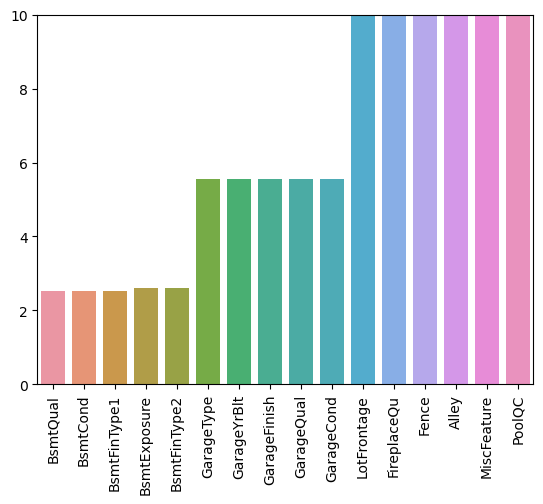

In [16]:
percent_nan = percent_missing(df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,10);

## Bsmt na

In [17]:
percent_nan[percent_nan < 5]

BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
BsmtExposure    2.602740
BsmtFinType2    2.602740
dtype: float64

In [18]:
df[df['BsmtQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


In [19]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [20]:
bsmt_na = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure']

df[bsmt_na] = df[bsmt_na].fillna(value = 'NA')

In [21]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

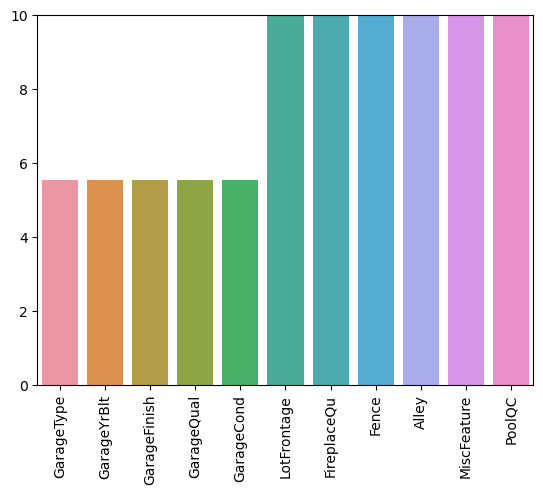

In [22]:
percent_nan = percent_missing(df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,10);

In [23]:
percent_nan[percent_nan < 5]

Series([], dtype: float64)

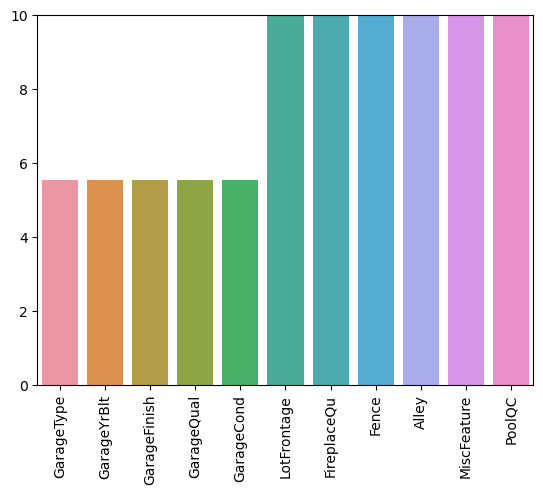

In [24]:
percent_nan = percent_missing(df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,10);

## Garage na

In [25]:
percent_nan[percent_nan < 10]

GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

In [26]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
garage_na = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

df[garage_na] = df[garage_na].fillna(value = 'NA')

In [28]:
df['GarageYrBlt'].fillna(value = 0, inplace=True)

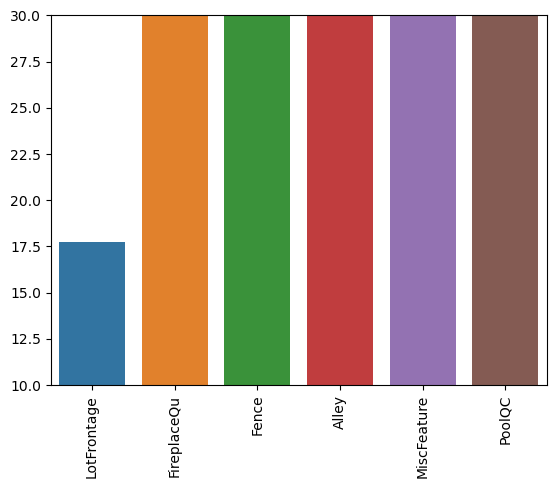

In [29]:
percent_nan = percent_missing(df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(10,30);

In [30]:
percent_nan[percent_nan < 20]

LotFrontage    17.739726
dtype: float64

## LotFrontage na

In [31]:
df[df['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [32]:
df['LotFrontage'].interpolate(method='linear', inplace=True)

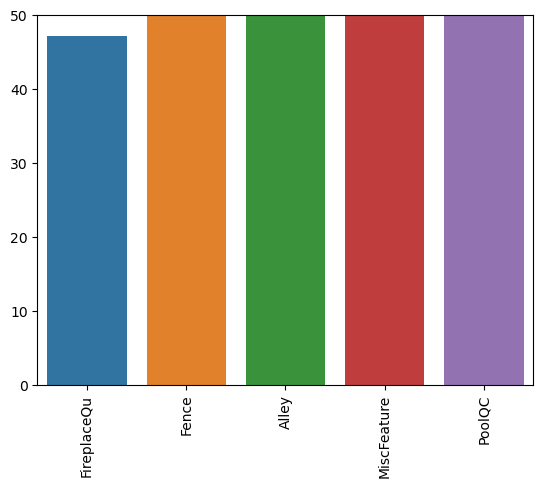

In [33]:
percent_nan = percent_missing(df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,50);

## FireplaceQu na

In [34]:
df['FireplaceQu'].fillna(value = 'NA', inplace = True)

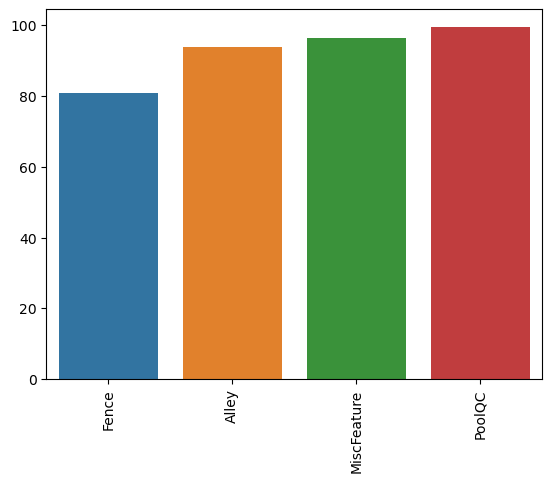

In [35]:
percent_nan = percent_missing(df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90);

# plt.ylim();

In [36]:
percent_nan.index

Index(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')

In [37]:
## These columns have more than 80 % of na values, that's hwy we have decided to simply drop them

nans = df[['Fence', 'Alley', 'MiscFeature', 'PoolQC']]

In [38]:
clean_df = df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)

In [39]:
percent_nan = percent_missing(clean_df)

In [40]:
percent_nan

Series([], dtype: float64)

<Axes: >

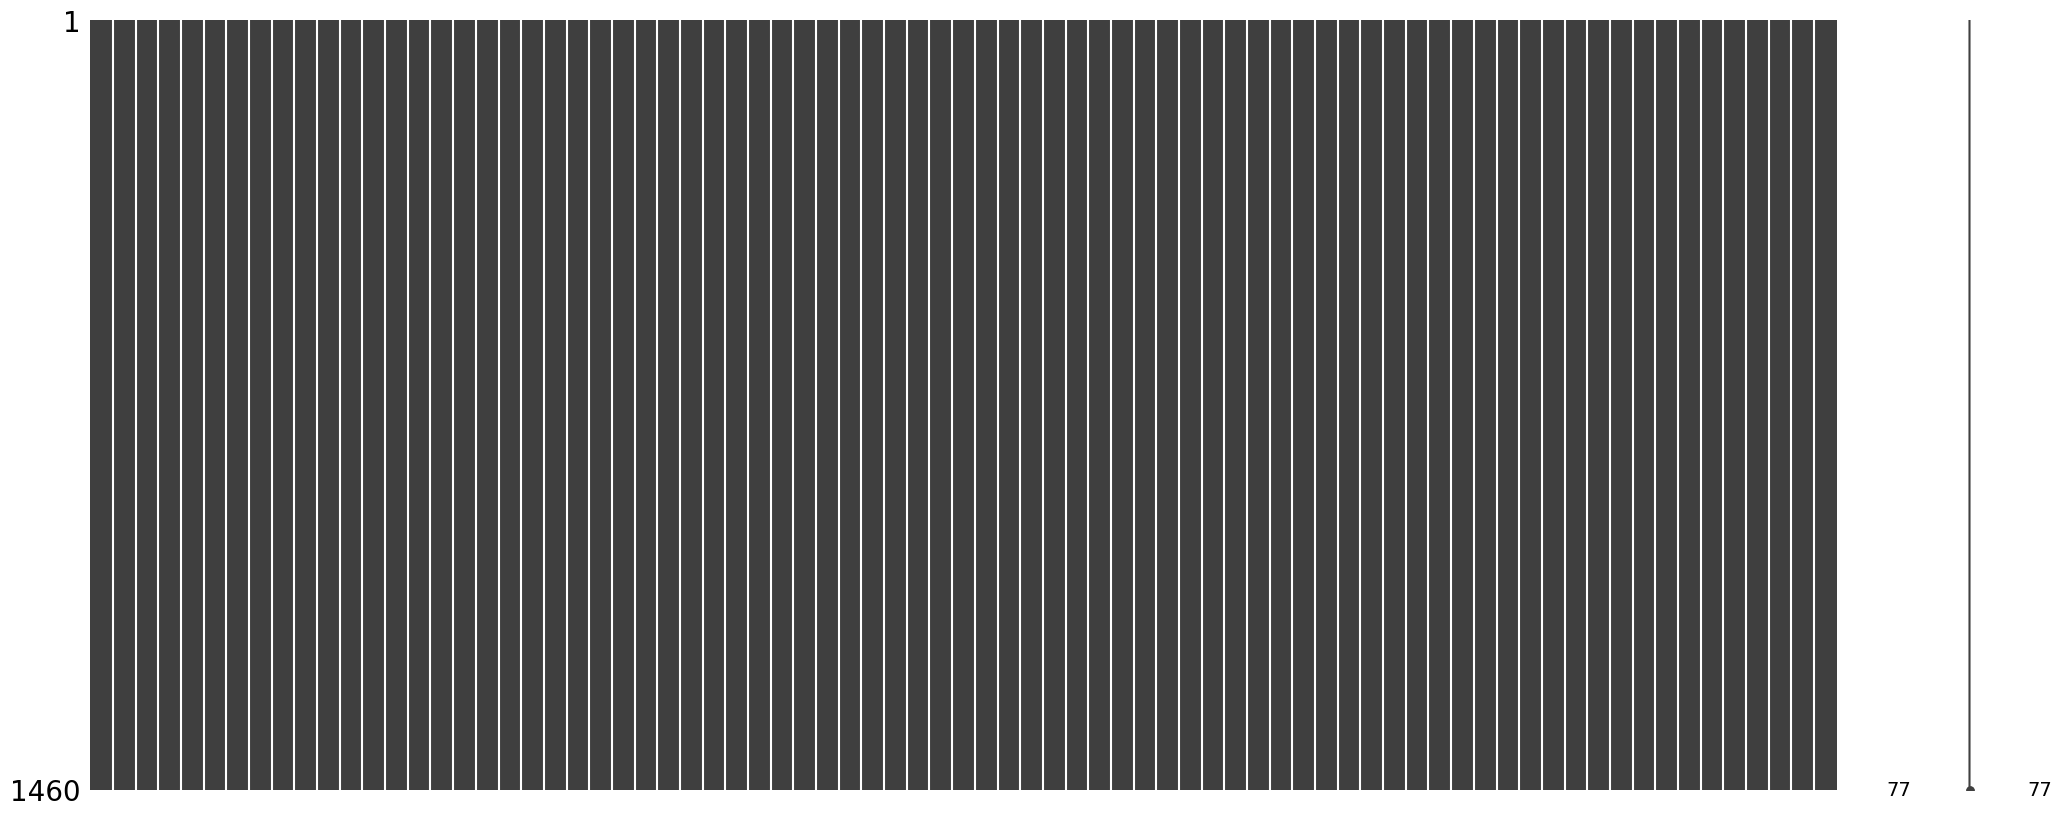

In [41]:
msno.matrix(clean_df)

# Feature Engineering

In [42]:
df = clean_df.copy()

In [43]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Dealing with Numerical Data

In [44]:
numerical = df.select_dtypes(include='number')
categorical = df.select_dtypes(include= object)

In [45]:
numerical.corr()['SalePrice'][:-1].sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
LotFrontage      0.310673
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [46]:
mask = np.triu(np.ones_like(numerical.corr()))

<Axes: >

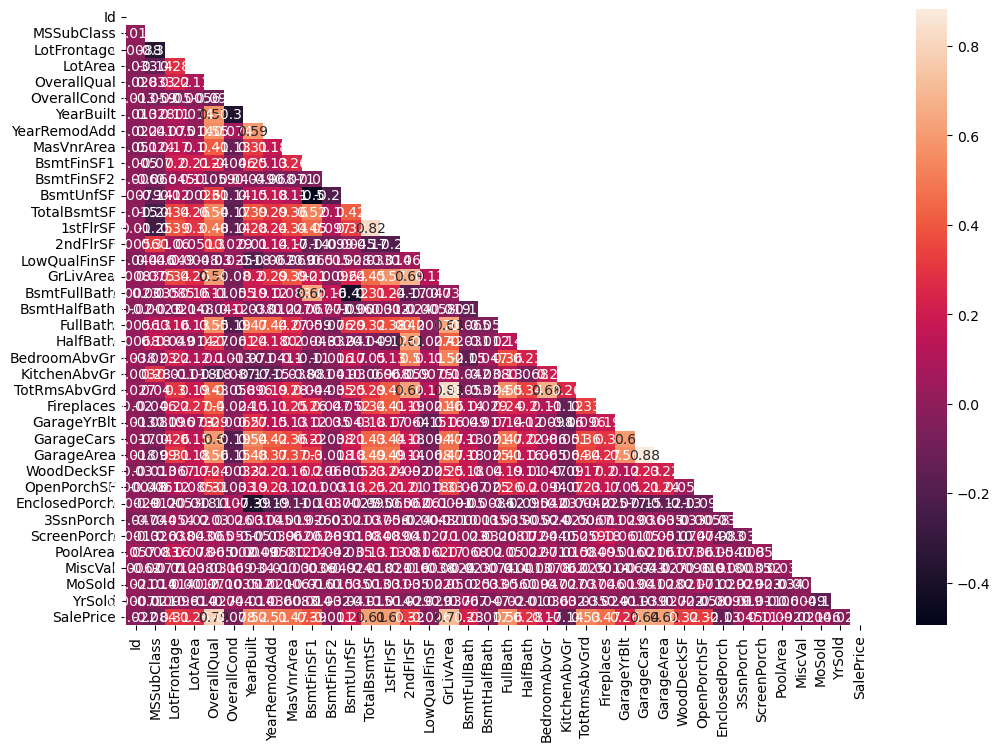

In [47]:
plt.figure(figsize=(12,8))

sns.heatmap(numerical.corr(), annot=True, mask=mask)

In [48]:
df['SalePrice'].max()

755000

In [56]:
encoder = LabelEncoder()

In [57]:
np.unique(encoder.fit_transform(df['MSZoning']))

array([0, 1, 2, 3, 4])

In [59]:
## Cat column Encoding

for i in df[categorical.columns]:
    df[i] = encoder.fit_transform(df[i])

In [60]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [61]:
df.corr()['SalePrice'][:-1].sort_values(ascending=False)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
                  ...   
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, Length: 76, dtype: float64

# Creating ML model

## Train test split

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [63]:
X = df.drop(['Id','SalePrice'], axis = 1)
y = df['SalePrice']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 75)
(292, 75)
(1168,)
(292,)


#### Decision Tree model

In [66]:
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [67]:
mean_error = mean_absolute_error(y_test, y_pred)
mean_sqrt_error = np.sqrt(mean_absolute_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f'The mean Absolute Error is: {mean_error}')
print(f'The mean Sqrt Error is: {mean_sqrt_error}')
print(f'The R2 score is : {R2}')

The mean Absolute Error is: 24074.10616438356
The mean Sqrt Error is: 155.15832612007503
The R2 score is : 0.7991814865367589


In [68]:
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - R2)*(n - 1)/(n - p - 1)

print(f'The Adjusted R2 score is : {adjusted_r2}')

The Adjusted R2 score is : 0.7294528360286892


#### Random Forest model

In [69]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [70]:
mean_error = mean_absolute_error(y_test, y_pred)
mean_sqrt_error = np.sqrt(mean_absolute_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - R2)*(n - 1)/(n - p - 1)

print(f'The mean Absolute Error is: {mean_error}')
print(f'The mean Sqrt Error is: {mean_sqrt_error}')
print(f'The R2 score is : {R2}')
print(f'The Adjusted R2 score is : {adjusted_r2}')

The mean Absolute Error is: 18399.559143835613
The mean Sqrt Error is: 135.64497463539007
The R2 score is : 0.8254940146697788
The Adjusted R2 score is : 0.7649016586523408


#### Linear Regression Model

In [71]:
lr_model = RandomForestRegressor()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [72]:
mean_error = mean_absolute_error(y_test, y_pred)
mean_sqrt_error = np.sqrt(mean_absolute_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2 = 1 - (1 - R2)*(n - 1)/(n - p - 1)

print(f'The mean Absolute Error is: {mean_error}')
print(f'The mean Sqrt Error is: {mean_sqrt_error}')
print(f'The R2 score is : {R2}')
print(f'The Adjusted R2 score is : {adjusted_r2}')

The mean Absolute Error is: 18305.697534246574
The mean Sqrt Error is: 135.2985496383704
The R2 score is : 0.8318265651895052
The Adjusted R2 score is : 0.7734330114358611


# Test csv

In [73]:
test_df = pd.read_csv('./test.csv')

<Axes: >

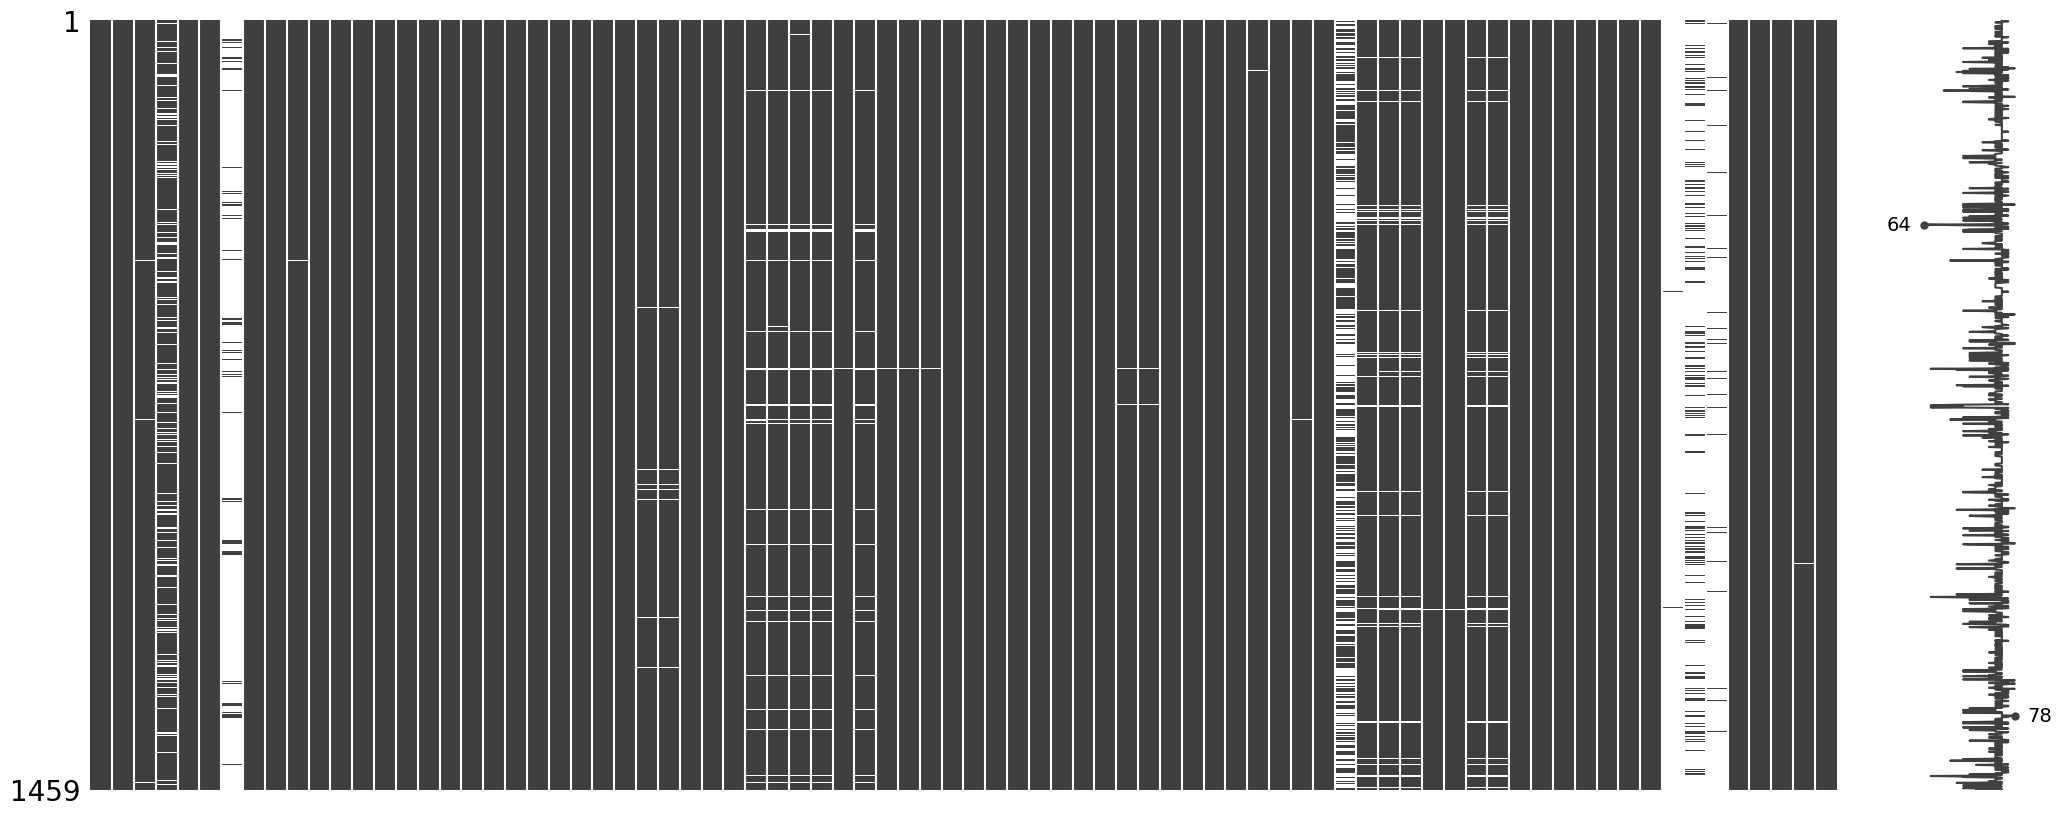

In [74]:
msno.matrix(test_df)

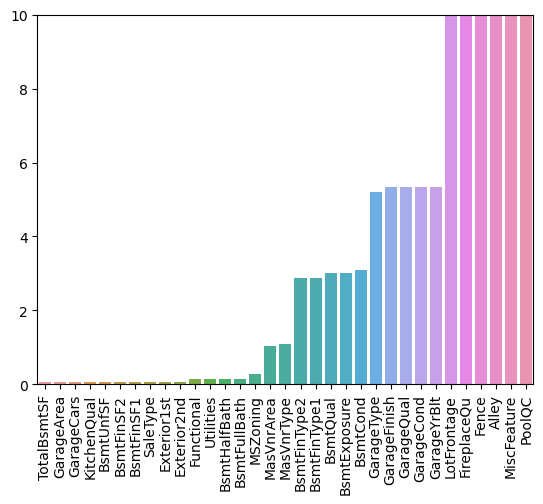

In [75]:
## Looking for NaN values

percent_nan = percent_missing(test_df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,10);

In [76]:
percent_nan[percent_nan < 5]

TotalBsmtSF     0.068540
GarageArea      0.068540
GarageCars      0.068540
KitchenQual     0.068540
BsmtUnfSF       0.068540
BsmtFinSF2      0.068540
BsmtFinSF1      0.068540
SaleType        0.068540
Exterior1st     0.068540
Exterior2nd     0.068540
Functional      0.137080
Utilities       0.137080
BsmtHalfBath    0.137080
BsmtFullBath    0.137080
MSZoning        0.274160
MasVnrArea      1.028101
MasVnrType      1.096642
BsmtFinType2    2.878684
BsmtFinType1    2.878684
BsmtQual        3.015764
BsmtExposure    3.015764
BsmtCond        3.084304
dtype: float64

In [77]:
for i in test_df.columns:
    if test_df[i].dtype == float:
        test_df[i]=test_df[i].interpolate(method = 'linear')

#### Replacing NaN with appropriate values

In [78]:
test_df['SaleType'].fillna(value = '0th', inplace = True)
test_df['KitchenQual'].fillna(value = 'Po', inplace = True)
test_df['Exterior1st'].fillna(value = 'Other', inplace = True)
test_df['Exterior2nd'].fillna(value = 'Other', inplace = True)
test_df['BsmtFullBath'].fillna(value = 0, inplace = True)
test_df['BsmtHalfBath'].fillna(value = 0, inplace = True)
test_df['Functional'].fillna(value = 'Typ', inplace = True)
test_df['Utilities'].fillna(method = 'ffill', inplace = True)
test_df['MSZoning'].fillna(method = 'bfill', inplace = True)
test_df['MasVnrType'].fillna(value = 'None', inplace=True)
test_df['FireplaceQu'].fillna(value = 'NA', inplace = True)
test_df[bsmt_na] = test_df[bsmt_na].fillna(value = 'NA')
test_df[garage_na] = test_df[garage_na].fillna(value = 'NA')

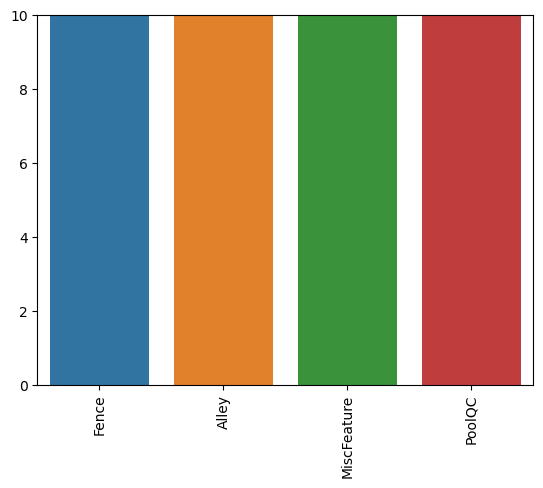

In [79]:
percent_nan = percent_missing(test_df)

sns.barplot(x = percent_nan.index, y = percent_nan.values)

plt.xticks(rotation = 90)

plt.ylim(0,10);

In [80]:
percent_nan.index

Index(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype='object')

In [81]:
test_df = test_df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis = 1)

<Axes: >

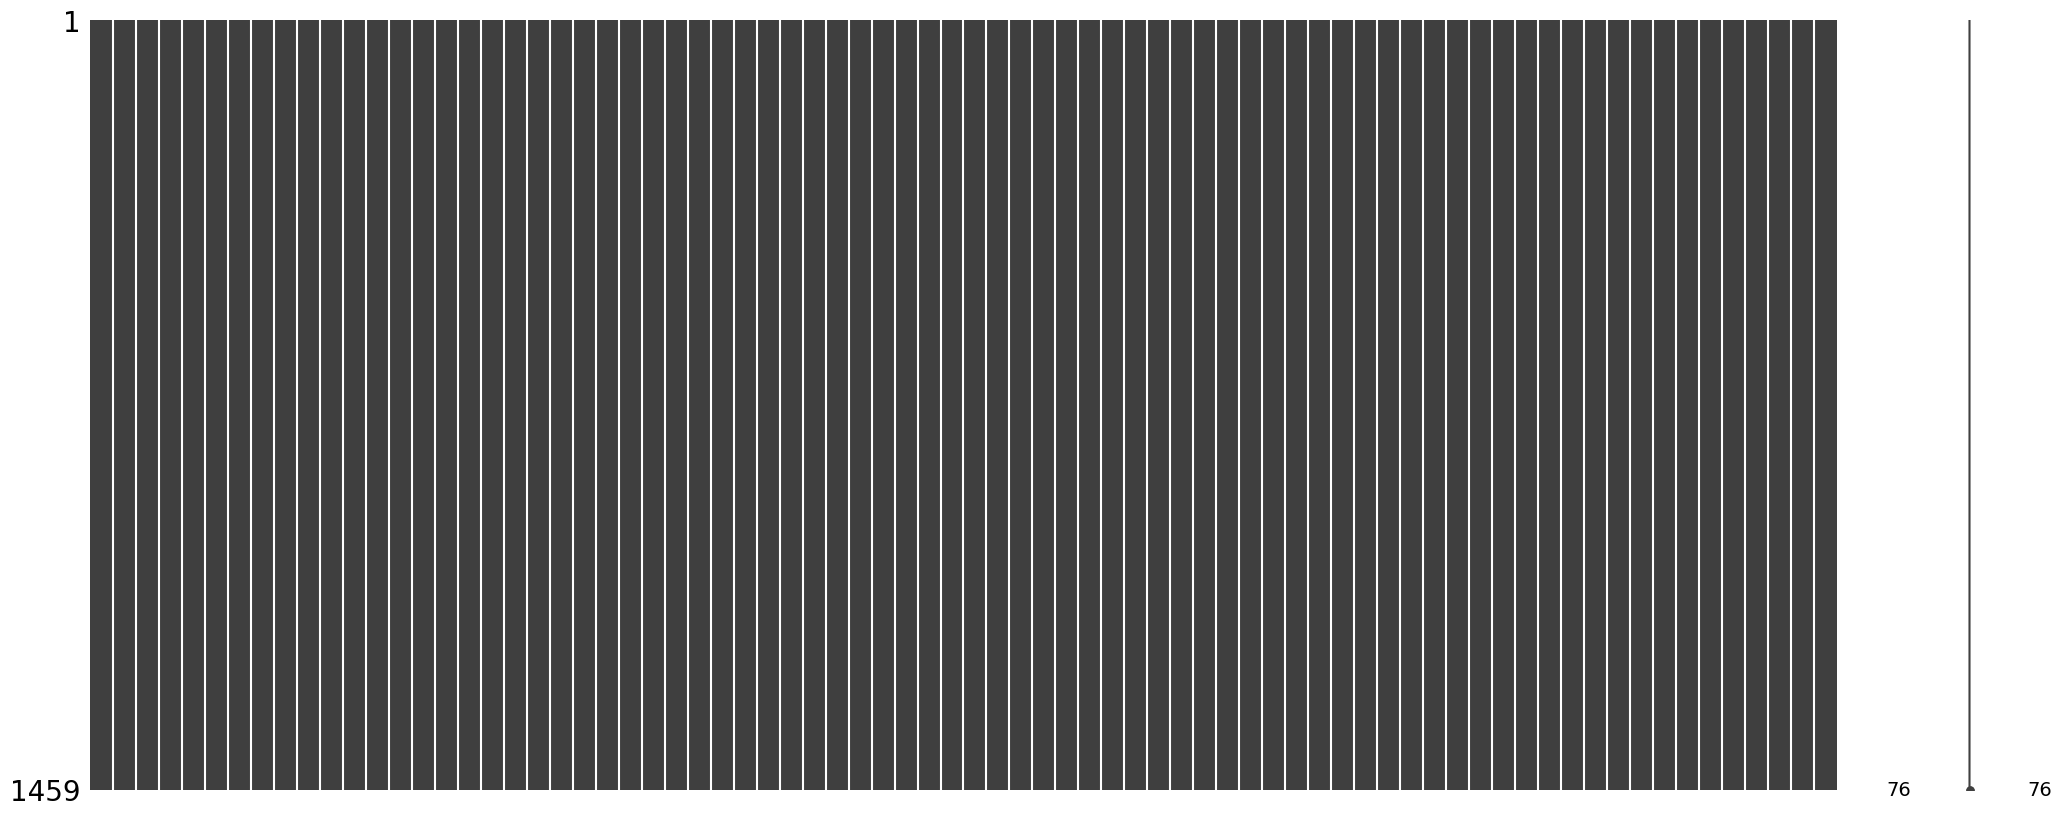

In [82]:
msno.matrix(test_df)

### Dealing with categorical test df

In [83]:
test_cats = test_df[categorical.columns]

In [84]:
for i in test_cats:
    test_df[i] = encoder.fit_transform(test_df[i])

In [93]:
X_train = df.drop(['SalePrice'], axis = 1)
y_train = df['SalePrice']

In [94]:
combined_data = pd.concat([X_train, test_df])

In [95]:
X_train_combined = combined_data.iloc[:len(X_train)].drop(['Id'],axis = 1)
X_test_combined = combined_data.iloc[len(X_train):].drop(['Id'],axis = 1)

In [96]:
rf_model.fit(X_train_combined, y_train)

RandomForestRegressor()

In [97]:
rf_model.score(X_train_combined, y_train)

0.9797567131642317

In [98]:
y_pred = rf_model.predict(X_test_combined)

In [99]:
y_pred

array([126607.08, 156946.  , 182613.14, ..., 146088.59, 119343.75,
       231818.33])

In [100]:
log_predicted = np.log(y_pred)

log_observed = np.log(y_train)

In [101]:
log_observed_reshaped = log_observed[:len(log_predicted)]

In [102]:
len(log_observed_reshaped)

1459

In [103]:
squared_diff = (log_predicted - log_observed_reshaped)**2

In [104]:
mean_squared_diff = np.mean(squared_diff)

rmse = np.sqrt(mean_squared_diff)

In [105]:
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.5361454598139694


## Final submission

In [132]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,9,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,9,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,9,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,9,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,9,4
1455,2916,160,4,21.0,1894,1,3,3,0,4,...,24,0,0,0,0,0,4,2006,9,0
1456,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,9,0
1457,2918,85,3,62.0,10441,1,3,3,0,4,...,32,0,0,0,0,700,7,2006,9,4


In [145]:
final_df = pd.DataFrame(test_df)

In [142]:
final_df = final_df.iloc[:-1]

In [146]:
final_df['SalePrice'] = y_pred

In [135]:
final_df['Id'].astype(int)

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int32

In [116]:
final_df.set_index('Id', inplace=True)

In [118]:
final_df.to_csv('sample_submission.csv')

In [149]:
sample_submission = final_df[['Id', 'SalePrice']]

In [152]:
sample_submission.set_index('Id').to_csv('sample_submission.csv')